In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [235]:
df = pd.read_csv('ecommerce_sales_data (2).csv')

In [236]:
df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


# Problem Understanding

## Target = Profit
## Type = Regression

In [237]:
df.shape

(3500, 7)

In [238]:
df.columns

Index(['Order Date', 'Product Name', 'Category', 'Region', 'Quantity', 'Sales',
       'Profit'],
      dtype='object')

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


In [240]:
df.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


In [241]:
df.isnull().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

In [242]:
df.duplicated().sum()

np.int64(0)

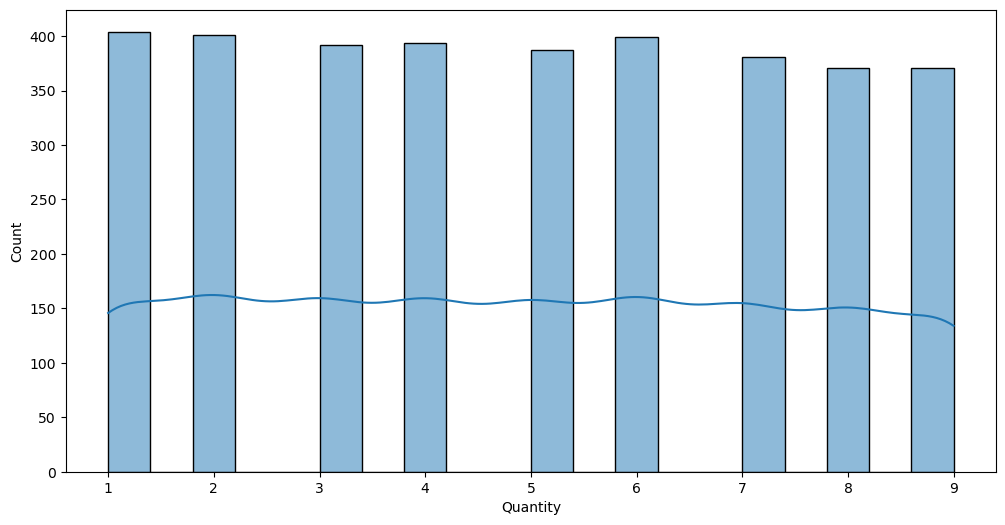

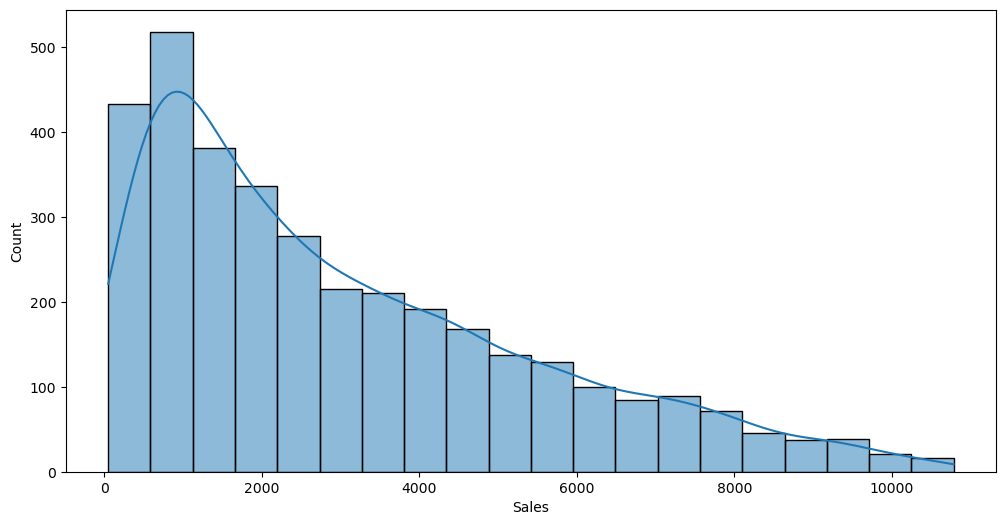

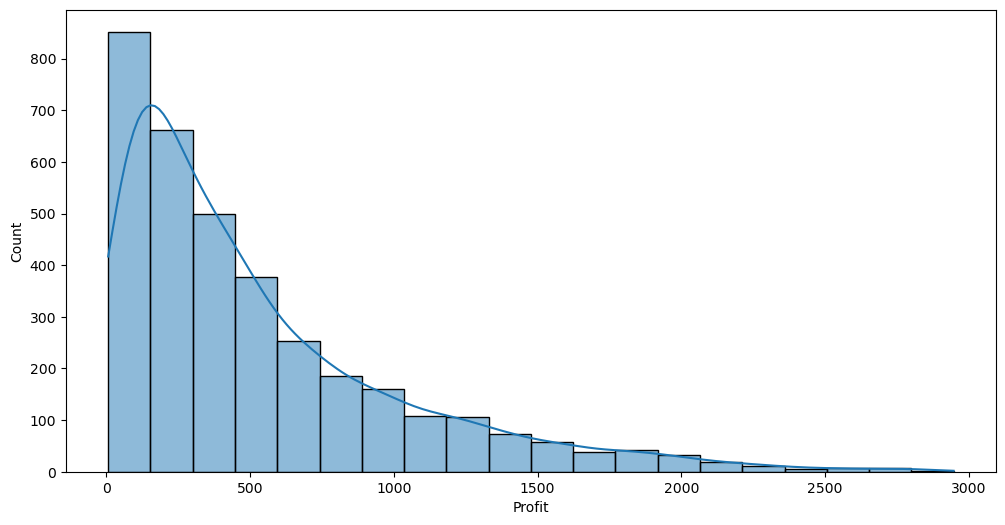

In [243]:
num = ['Quantity', 'Sales','Profit']

for i in num:
    plt.figure(figsize = (12, 6))
    sns.histplot(df[i], kde = True, bins = 20)

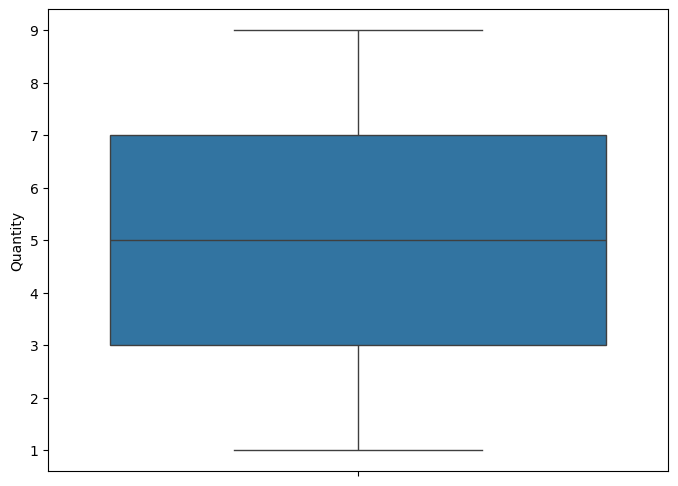

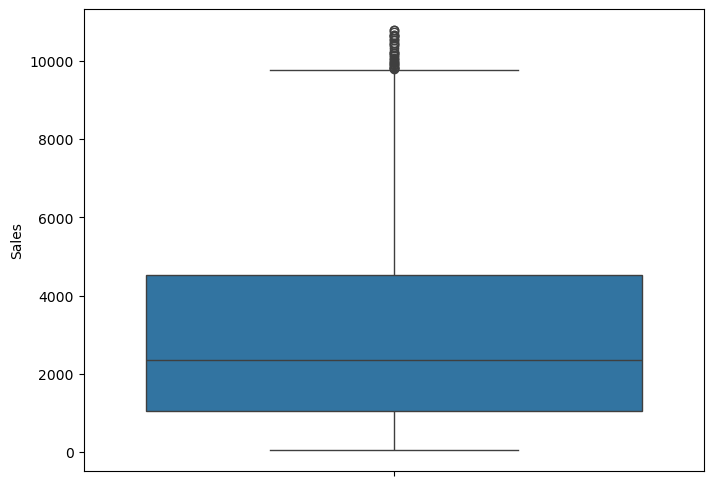

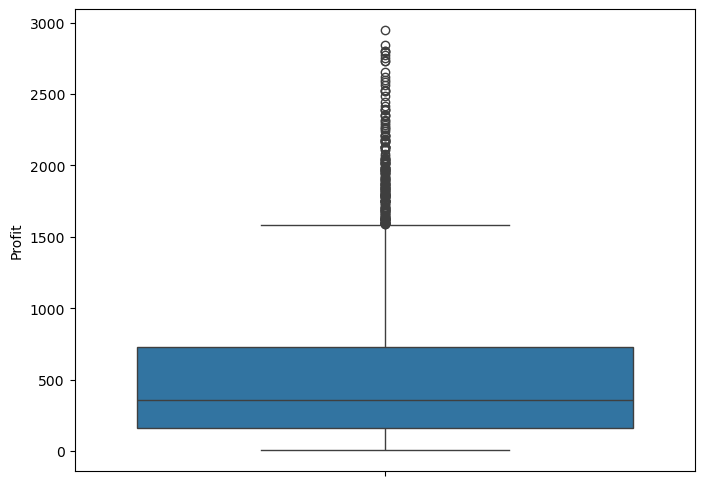

In [244]:
for i in num:
    plt.figure(figsize = (8,6))
    sns.boxplot(df[i])

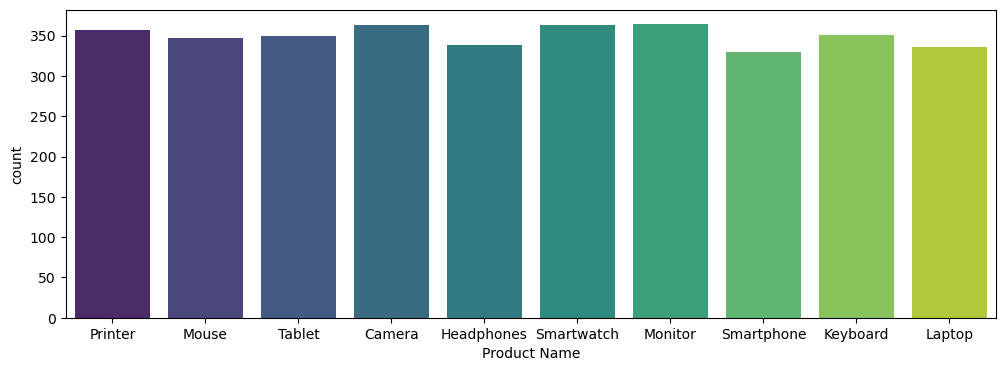

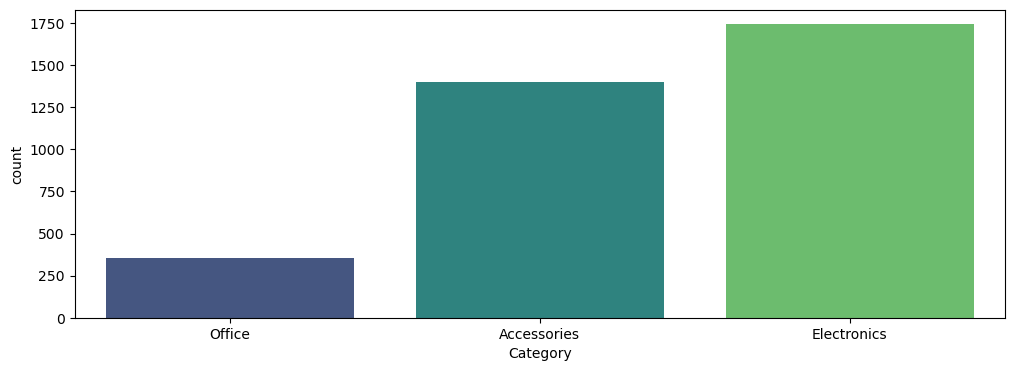

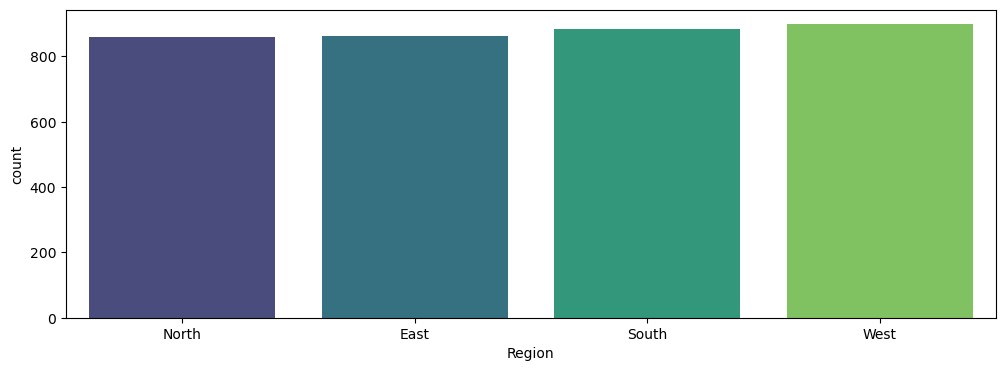

In [245]:
categoricalCol = ['Product Name', 'Category', 'Region']

for i in categoricalCol:
    plt.figure(figsize = (12,4))
    sns.countplot(x = df[i], palette = 'viridis')
    plt.show()

<Axes: >

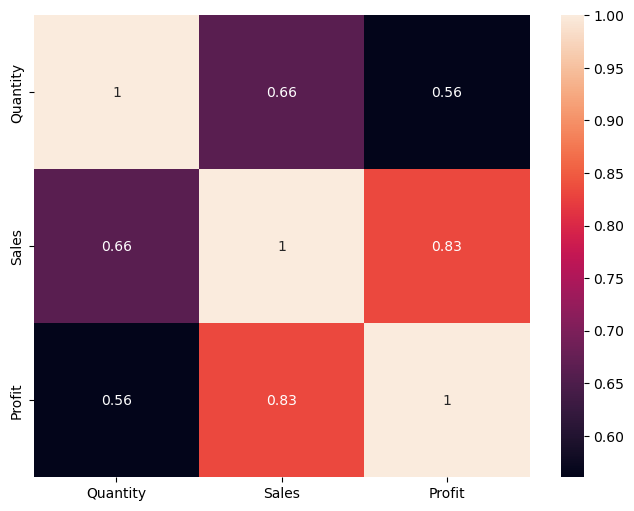

In [246]:
plt.figure(figsize = (8, 6))
sns.heatmap(data = df.corr(numeric_only = True), annot = True)

# Data Cleaning

In [247]:
df.duplicated().sum()

np.int64(0)

IQR method for Sales and Profit

In [248]:
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

lower_sales = max(0, Q1_sales - 1.5 * IQR_sales)
upper_sales = Q3_sales + 1.5 * IQR_sales

# Outliers
sales_outliers = df[(df['Sales'] < lower_sales) | (df['Sales'] > upper_sales)]

sales_outliers

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
32,2023-04-09,Laptop,Electronics,North,9,10773,1907.36
147,2022-10-23,Keyboard,Accessories,West,9,10035,1486.30
153,2024-08-08,Monitor,Accessories,North,9,10530,2387.63
267,2024-01-25,Tablet,Electronics,East,9,10188,2165.78
293,2023-08-08,Monitor,Accessories,North,9,10458,2799.48
379,2022-05-09,Printer,Office,West,9,10656,961.30
455,2023-12-29,Camera,Electronics,West,9,9972,2566.01
846,2024-05-14,Camera,Electronics,West,9,10143,1690.66
977,2024-01-05,Laptop,Electronics,West,9,9783,2347.49
1064,2022-09-15,Keyboard,Accessories,East,9,9810,549.46


In [249]:
Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

lower_profit = max(0, Q1_profit - 1.5 * IQR_profit)
upper_profit = Q3_profit + 1.5 * IQR_profit

# Outlier
profit_outliers = df[(df['Profit'] < lower_profit) | (df['Profit'] > upper_profit)]
profit_outliers

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
12,2023-12-21,Tablet,Electronics,North,7,7462,2166.17
32,2023-04-09,Laptop,Electronics,North,9,10773,1907.36
55,2023-12-28,Headphones,Accessories,East,7,8155,1587.91
60,2022-09-26,Headphones,Accessories,South,7,6895,1596.35
92,2022-12-14,Camera,Electronics,South,7,7518,1655.91
...,...,...,...,...,...,...,...
3405,2023-07-03,Monitor,Accessories,South,6,6402,1602.79
3411,2022-04-11,Smartphone,Electronics,East,9,8145,2384.42
3468,2022-03-25,Keyboard,Accessories,North,7,7679,2270.08
3490,2023-05-14,Laptop,Electronics,West,9,9702,2771.49


In [250]:
df['Sales'] = np.where(df['Sales'] > upper_sales, upper_sales,
                       np.where(df['Sales'] < lower_sales, lower_sales, df['Sales']))

df['Profit'] = np.where(df['Profit'] > upper_profit, upper_profit,
                        np.where(df['Profit'] < lower_profit, lower_profit, df['Profit']))

# Feature Engineering

In [251]:
df.dtypes

Order Date       object
Product Name     object
Category         object
Region           object
Quantity          int64
Sales           float64
Profit          float64
dtype: object

In [252]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [253]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df['Day'] = df['Order Date'].dt.day

df.drop(columns = 'Order Date', inplace = True)

In [254]:
df.head()

,Product Name,Category,Region,Quantity,Sales,Profit,Year,Month,Day
0,Printer,Office,North,4,3640.0,348.93,2024,December,31
1,Mouse,Accessories,East,7,1197.0,106.53,2022,November,27
2,Tablet,Electronics,South,5,5865.0,502.73,2022,May,11
3,Mouse,Accessories,South,2,786.0,202.87,2024,March,16
4,Mouse,Accessories,West,1,509.0,103.28,2022,September,10


In [255]:
df['Quantity'].min()

1

In [256]:
df['Profit per Unit'] = df['Profit'] / df['Quantity']
df['Sales per Unit'] = df['Sales'] / df['Quantity']

In [257]:
df.head()

,Product Name,Category,Region,Quantity,Sales,Profit,Year,Month,Day,Profit per Unit,Sales per Unit
0,Printer,Office,North,4,3640.0,348.93,2024,December,31,87.232500,910.0
1,Mouse,Accessories,East,7,1197.0,106.53,2022,November,27,15.218571,171.0
2,Tablet,Electronics,South,5,5865.0,502.73,2022,May,11,100.546000,1173.0
3,Mouse,Accessories,South,2,786.0,202.87,2024,March,16,101.435000,393.0
4,Mouse,Accessories,West,1,509.0,103.28,2022,September,10,103.280000,509.0


In [258]:
quantity_threshold = df['Quantity'].median()

df['High_Quantity_Flag'] = np.where(
    df['Quantity'] > quantity_threshold,
    1,
    0
)

df.head()

,Product Name,Category,Region,Quantity,Sales,Profit,Year,Month,Day,Profit per Unit,Sales per Unit,High_Quantity_Flag
0,Printer,Office,North,4,3640.0,348.93,2024,December,31,87.232500,910.0,0
1,Mouse,Accessories,East,7,1197.0,106.53,2022,November,27,15.218571,171.0,1
2,Tablet,Electronics,South,5,5865.0,502.73,2022,May,11,100.546000,1173.0,0
3,Mouse,Accessories,South,2,786.0,202.87,2024,March,16,101.435000,393.0,0
4,Mouse,Accessories,West,1,509.0,103.28,2022,September,10,103.280000,509.0,0


# Encoding